In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [3]:
df = pd.read_csv('creditfraud.csv') 

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(689, 31)

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    689 non-null    int64  
 1   V1      689 non-null    float64
 2   V2      689 non-null    float64
 3   V3      689 non-null    float64
 4   V4      689 non-null    float64
 5   V5      689 non-null    float64
 6   V6      689 non-null    float64
 7   V7      689 non-null    float64
 8   V8      689 non-null    float64
 9   V9      689 non-null    float64
 10  V10     689 non-null    float64
 11  V11     689 non-null    float64
 12  V12     689 non-null    float64
 13  V13     689 non-null    float64
 14  V14     689 non-null    float64
 15  V15     689 non-null    float64
 16  V16     689 non-null    float64
 17  V17     689 non-null    float64
 18  V18     689 non-null    float64
 19  V19     689 non-null    float64
 20  V20     689 non-null    float64
 21  V21     689 non-null    float64
 22  V2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,250.914369,-0.173822,0.208771,0.871460,0.316888,0.003751,0.175588,0.125179,-0.059893,-0.022869,...,0.004503,-0.103478,-0.041867,-0.004573,0.115913,0.023620,0.026782,-0.015702,70.012438,0.002903
std,153.179272,1.310078,1.190528,1.032112,1.267372,1.118023,1.235330,0.851326,0.821114,0.894235,...,0.602965,0.603846,0.364727,0.623786,0.427522,0.469338,0.305652,0.286371,204.364230,0.053838
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,110.000000,-0.895224,-0.174041,0.309867,-0.435770,-0.534082,-0.614742,-0.303337,-0.159859,-0.517512,...,-0.220075,-0.527400,-0.176836,-0.387958,-0.168582,-0.313118,-0.047547,-0.027602,5.970000,0.000000
50%,252.000000,-0.376162,0.284980,0.904686,0.429757,-0.110459,-0.079024,0.119319,0.042147,-0.078400,...,-0.074659,-0.069830,-0.047526,0.087536,0.144624,-0.015710,0.022828,0.022043,17.240000,0.000000
75%,382.000000,1.107029,0.881817,1.514665,1.141093,0.459215,0.489476,0.569707,0.251972,0.415996,...,0.095918,0.301532,0.068045,0.427113,0.438241,0.262577,0.114264,0.087456,57.500000,0.000000
max,519.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


<AxesSubplot:>

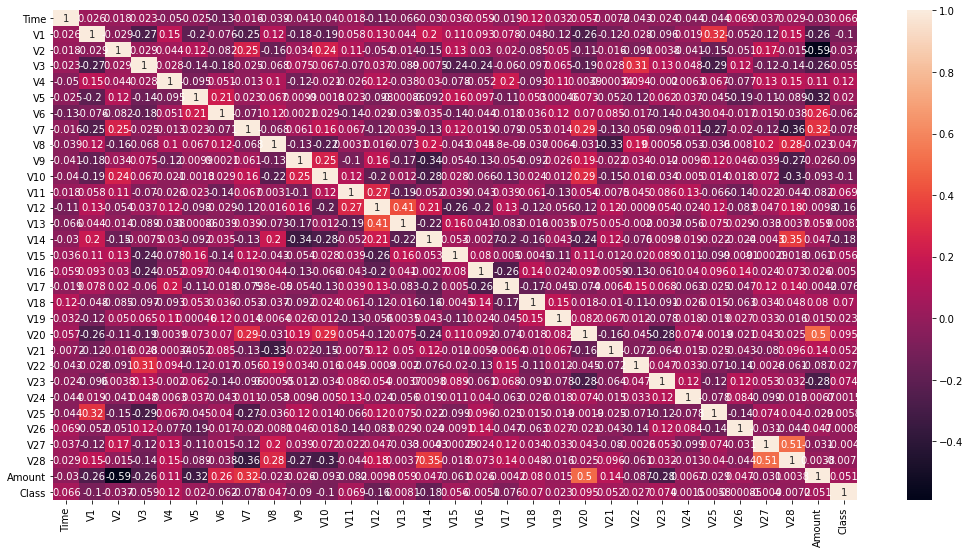

In [15]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)

In [8]:
# Splitting the dataset into the Training set and Test set  
X = df.iloc[:,20:29].values
 
y = df['Class']

In [9]:
X.shape

(689, 9)

In [10]:
scaler = StandardScaler() 
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled_drop = X_scaled.drop(X_scaled.columns[[1]], axis=1) 

In [11]:
pca = PCA(n_components=0.95) 
x_pca = pca.fit_transform(X_scaled_drop)
x_pca=pd.DataFrame(x_pca) 
print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape) 

Before PCA, X dataframe shape =  (689, 9) 
After PCA, x_pca dataframe shape =  (689, 8)


In [12]:
print(x_pca.shape)
print(y.shape)

(689, 8)
(689,)


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 4)  

In [14]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(X_train,y_train)
y_pred=lo.predict(X_test)

In [66]:
from sklearn.metrics import f1_score
print('f1_score : ',f1_score(y_test,y_pred,average='micro'))

f1_score :  0.9927536231884058


In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[137   0]
 [  1   0]]


In [17]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       137
           1       0.00      0.00      0.00         1

    accuracy                           0.99       138
   macro avg       0.50      0.50      0.50       138
weighted avg       0.99      0.99      0.99       138



C:\Users\meyya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
